#**Step 1 : Business Problem Understanding**
Implement a support vector machine (SVM) to classify images of cats and dogs

#**Step 2 : Data Understanding**
Importing Neccessary Libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
import os
from skimage.io import imread
from skimage.transform import resize

##**Image**

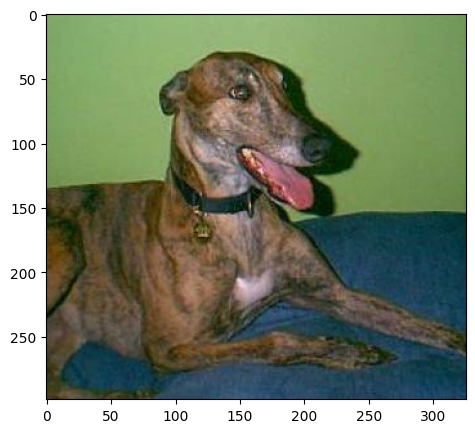

In [ ]:
plt.figure(figsize=(10,5))
img = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/dog/dog.12283.jpg'
plt.imshow(imread(img))

##**Convert image to Matrix / Vector**

In [ ]:
img_path = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/dog/dog.12283.jpg'
img = imread(img_path)
img

array([[[127, 167, 104],
        [127, 167, 104],
        [128, 168, 105],
        ...,
        [114, 156,  92],
        [114, 156,  92],
        [114, 156,  92]],

       [[127, 167, 104],
        [127, 167, 104],
        [128, 168, 105],
        ...,
        [113, 155,  91],
        [113, 155,  91],
        [113, 155,  91]],

       [[127, 167, 104],
        [127, 167, 104],
        [128, 168, 105],
        ...,
        [112, 152,  89],
        [112, 152,  89],
        [112, 152,  89]],

       ...,

       [[ 72,  61,  33],
        [ 70,  59,  29],
        [ 71,  60,  32],
        ...,
        [ 17,  62,  95],
        [ 20,  65,  98],
        [ 23,  68, 101]],

       [[ 72,  60,  34],
        [ 70,  59,  31],
        [ 72,  61,  33],
        ...,
        [ 21,  66,  99],
        [ 23,  68, 101],
        [ 26,  71, 104]],

       [[ 70,  60,  35],
        [ 69,  59,  32],
        [ 71,  61,  34],
        ...,
        [ 27,  70, 105],
        [ 28,  71, 106],
        [ 30,  73, 108]]

In [ ]:
img.shape

(299, 326, 3)

##**Resize the Matrix**

In [ ]:
img_resize = resize(img, (15,15))
img_resize.shape

In [ ]:
img_resize

array([[[0.50532506, 0.66278025, 0.41530329],
        [0.52619726, 0.68430797, 0.43525293],
        [0.5454825 , 0.70170928, 0.45240372],
        [0.56148719, 0.71494407, 0.46383786],
        [0.57740259, 0.72266951, 0.46931023],
        [0.58501608, 0.71976337, 0.47758996],
        [0.5843746 , 0.71539318, 0.47685112],
        [0.58730862, 0.71649496, 0.47761805],
        [0.58166147, 0.70842616, 0.46890822],
        [0.56051079, 0.69190987, 0.45204108],
        [0.54245593, 0.67281776, 0.43448208],
        [0.52663875, 0.65730554, 0.41685163],
        [0.50758006, 0.63986395, 0.39730556],
        [0.4769969 , 0.62133176, 0.37802696],
        [0.45512178, 0.60278599, 0.36024703]],

       [[0.50263086, 0.65988578, 0.40864692],
        [0.52027115, 0.68016097, 0.42517468],
        [0.54443255, 0.69434451, 0.43695816],
        [0.56123638, 0.7060056 , 0.44395034],
        [0.5653306 , 0.69667831, 0.44127288],
        [0.53921833, 0.61305931, 0.39874048],
        [0.47160137, 0.51407761,

##**Flatten the Matrix / Vector**

In [ ]:
flatten_img = img_resize.flatten()
flatten_img

array([0.50532506, 0.66278025, 0.41530329, 0.52619726, 0.68430797,
       0.43525293, 0.5454825 , 0.70170928, 0.45240372, 0.56148719,
       0.71494407, 0.46383786, 0.57740259, 0.72266951, 0.46931023,
       0.58501608, 0.71976337, 0.47758996, 0.5843746 , 0.71539318,
       0.47685112, 0.58730862, 0.71649496, 0.47761805, 0.58166147,
       0.70842616, 0.46890822, 0.56051079, 0.69190987, 0.45204108,
       0.54245593, 0.67281776, 0.43448208, 0.52663875, 0.65730554,
       0.41685163, 0.50758006, 0.63986395, 0.39730556, 0.4769969 ,
       0.62133176, 0.37802696, 0.45512178, 0.60278599, 0.36024703,
       0.50263086, 0.65988578, 0.40864692, 0.52027115, 0.68016097,
       0.42517468, 0.54443255, 0.69434451, 0.43695816, 0.56123638,
       0.7060056 , 0.44395034, 0.5653306 , 0.69667831, 0.44127288,
       0.53921833, 0.61305931, 0.39874048, 0.47160137, 0.51407761,
       0.32895946, 0.47932806, 0.54005301, 0.33775585, 0.53108495,
       0.63589693, 0.40192916, 0.55258984, 0.67675979, 0.42990

In [ ]:
flatten_img.shape

(675,)

#**Read the images from the image folder and convert thrm into Matrix store it into the List**

In [ ]:
input_dir = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM'
categories = ['cat','dog']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)

/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.100.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.0.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.1.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.10.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.101.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.102.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.103.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.104.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.105.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.106.jpg
/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.1

In [ ]:
data[1]

array([0.85823977, 0.69245409, 0.39373018, 0.92342688, 0.75465258,
       0.44852749, 0.96396506, 0.80310075, 0.49069013, 0.93190017,
       0.73018508, 0.44880537, 0.7933373 , 0.496517  , 0.24602916,
       0.78052454, 0.50436224, 0.18513636, 0.96355083, 0.81529771,
       0.48659934, 0.99702115, 0.90709956, 0.59462449, 0.9944072 ,
       0.90423419, 0.58575158, 0.98347338, 0.87298745, 0.53999319,
       0.97406135, 0.83633664, 0.48707508, 0.98535261, 0.87589866,
       0.56144106, 0.98642808, 0.89133375, 0.59875002, 0.98339254,
       0.89664457, 0.6205367 , 0.97252979, 0.8534051 , 0.55744364,
       0.84369349, 0.67334199, 0.38219706, 0.89033572, 0.72023549,
       0.41873257, 0.9514256 , 0.7871127 , 0.475918  , 0.96389927,
       0.81277493, 0.50591647, 0.87829994, 0.63389904, 0.37422421,
       0.87574744, 0.52492584, 0.23124703, 0.95594104, 0.69526142,
       0.34962804, 0.99367356, 0.88914065, 0.56713322, 0.99387975,
       0.90458924, 0.58142447, 0.96462734, 0.82293312, 0.47395

In [ ]:
labels[1]

0

#**List of Matrix converted into Numpy Array**

In [ ]:
data = np.asarray(data)
labels = np.asarray(labels)

In [ ]:
data.shape

(426, 675)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#**Split the data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, shuffle=True, stratify=labels)

#**Build SVM Model for Classification**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

##**Model Training**

In [ ]:
svm_model.fit(X_train,y_train)

SVC()

##**Model Prediction**

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

##**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6627906976744186


##**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model, data, labels, cv=2)
cross_val_score

array([0.58215962, 0.57276995])

In [ ]:
mean_Accuracy = cross_val_score.mean()
mean_Accuracy

0.5774647887323944

In [ ]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        42
           1       0.67      0.68      0.67        44

    accuracy                           0.66        86
   macro avg       0.66      0.66      0.66        86
weighted avg       0.66      0.66      0.66        86



##**Hyperparameter Tunning - GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = SVC()
parameters = [{'gamma': [0.01,0.001, 0.0001], 'C': [1,10,100,1000]}]
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [ ]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=1, gamma=0.01)

In [ ]:
y_pred1 = best_estimator.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

##**Image Prediction**

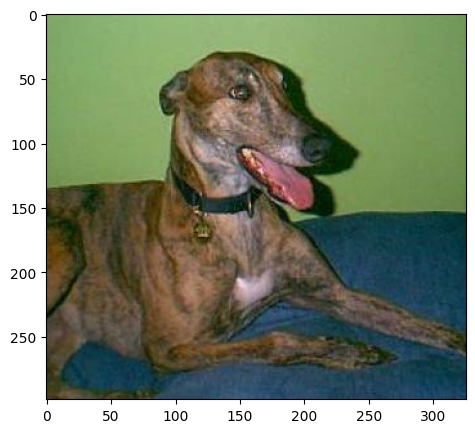

In [ ]:
plt.figure(figsize=(10,5))
img1 = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/dog/dog.12283.jpg'
plt.imshow(imread(img1))

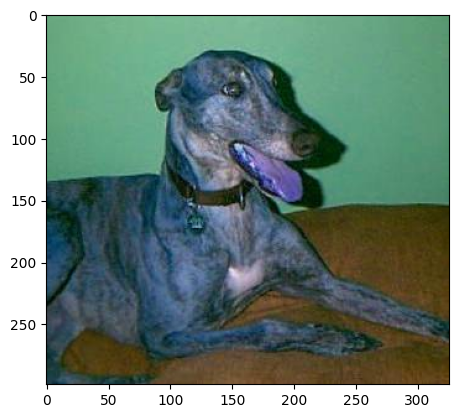

In [ ]:
import cv2 as cv
img_path = cv.imread(img1)
plt.imshow(img_path)

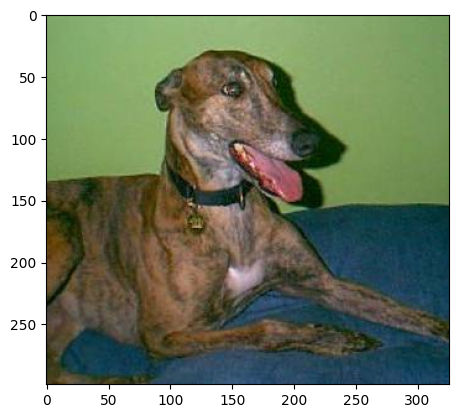

In [ ]:
img_dog = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/dog/dog.12283.jpg'
img_path = cv.imread(img_dog)
plt.imshow(imread(img_dog))

##**Function that Classify the image**

In [ ]:
def image_classify_pred(image):
  img_new = imread(image)
  img_new1 = resize(img_new, (15,15))
  img_flatten = img_new1.flatten()
  img_array = np.asarray(img_flatten)
  result = svm_model.predict(img_array.reshape(1,-1))
  img_path = cv.imread(image)
  plt.imshow(img_path)
  if result[0] == 1:
    print("Reslt = ", result[0])
    return "Dog"
  else:
    return "Cat"

Reslt =  1


'Dog'

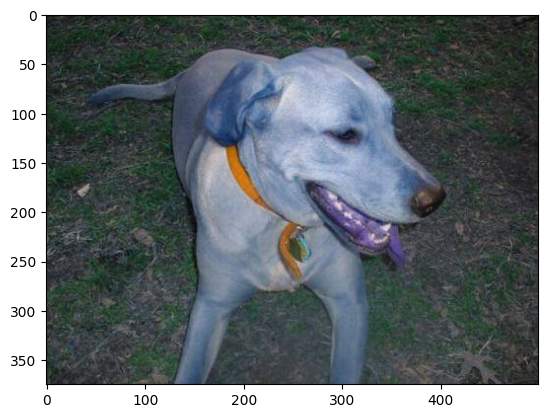

In [ ]:
img2= '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/dog/dog.12285.jpg'
image_classify_pred(img2)

'Cat'

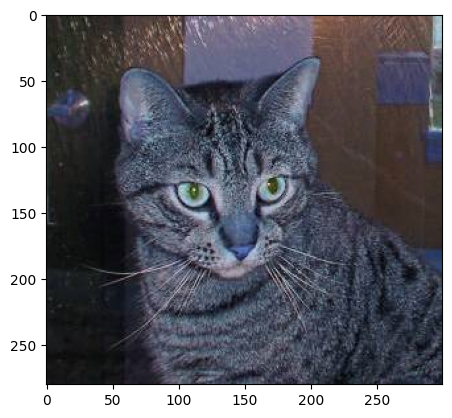

In [ ]:
img3= '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.1.jpg'
image_classify_pred(img3)

'Cat'

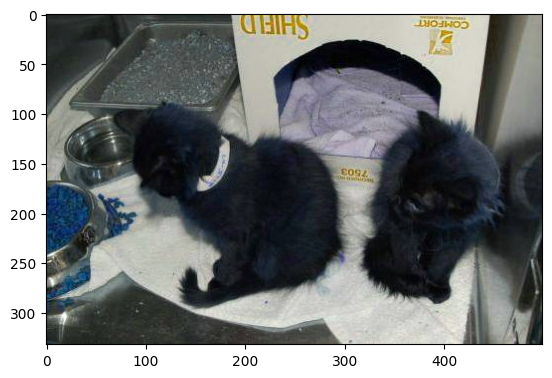

In [ ]:
img4 = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/cat/cat.108.jpg'
image_classify_pred(img4)

Reslt =  1


'Dog'

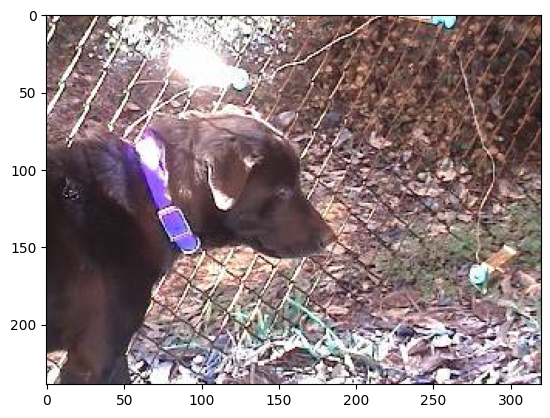

In [ ]:
img5 = '/content/drive/MyDrive/Machine Learning Projects/Cat_Dog_Classification_SVM/dog/dog.12432.jpg'
image_classify_pred(img5)